<img src='https://storage.googleapis.com/kaggle-datasets-images/228/482/a520351269b547c89afe790820a1087e/dataset-cover.jpeg'><br>
* ref : kaggle  : https://www.kaggle.com/uciml/pima-indians-diabetes-database
    
    

## Pima Indians Diabetes Database
* Predict the onset of diabetes based on diagnostic measures
* UCI Machine Learning - updated 5 years ago (Version 1)

# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# read

In [2]:
df = pd.read_csv('../../kaggle/pima_indians/diabetes.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Neural Network

In [4]:
np.random.seed(0)     # global seed
tf.random.set_seed(0) # tf global seed

In [5]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

## model

In [6]:
model = Sequential()

# 입력층
model.add(
    Dense(
        units=10,             # 출력층 개수
        input_dim=8,          # 입력층 개수, feature 개수
        activation='relu',    # 활성화 함수
    )
)

# layers
model.add(Dense(units=8, activation='relu', ))
model.add(Dense(units=4, activation='relu', ))

# 출력층
model.add(
    Dense(
        units=1,              # 출력층 개수
        activation='sigmoid', # 활성화 함수
    )
)

model.compile(
    loss='binary_crossentropy', # loss 함수
    optimizer='adam',           # adam = momentum + adaboost
    metrics=['accuracy'], 
)

## callbacks

In [7]:
stopping = EarlyStopping(
    monitor='val_loss',  # 평가지표
    patience=10,          # 평가지표 하락을 허용하는 횟수
)

In [8]:
model_path = './saved_model/{epoch:03d}_{val_loss:.4f}.hdf5'

In [9]:
checkpoint = ModelCheckpoint(
    model_path,          # 저장 디렉토리
    monitor='val_loss', 
    save_weights_only=True, 
    save_best_only=True, # 점수 개선시에만 저장
    period=1, 
)

## fit

In [10]:
history = model.fit(
    X, y, 
    batch_size=10, 
    epochs=100, 
    verbose='auto', 
    callbacks=[stopping, checkpoint], 
    validation_split=0.2, 
    shuffle=True, 
)

Epoch 1/100
62/62 [==============================] - 1s 4ms/step - loss: 5.8121 - accuracy: 0.4951 - val_loss: 2.9413 - val_accuracy: 0.6299
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 2.8533 - accuracy: 0.5375 - val_loss: 1.6776 - val_accuracy: 0.6234
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 1.6724 - accuracy: 0.5586 - val_loss: 1.2657 - val_accuracy: 0.5065
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 1.2338 - accuracy: 0.5700 - val_loss: 1.1907 - val_accuracy: 0.6883
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 1.0547 - accuracy: 0.5961 - val_loss: 0.9965 - val_accuracy: 0.6688
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.9037 - accuracy: 0.6140 - val_loss: 0.9206 - val_accuracy: 0.6494
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.8012 - accuracy: 0.6189 - val_loss: 0.9082 - val_accuracy: 0.6883
Epoch 8/100
6

## evaluate

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']

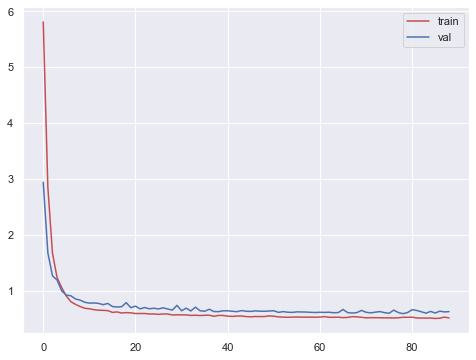

In [13]:
f = plt.subplots(figsize=(8, 6))
plt.plot(np.arange(len(train_loss)), train_loss, c='r', label='train')
plt.plot(np.arange(len(train_loss)), val_loss, c='b', label='val')
plt.legend(); plt.show()

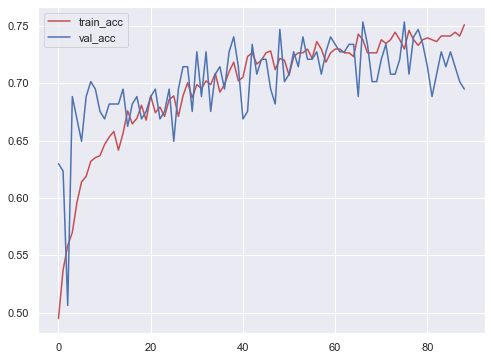

In [14]:
f = plt.subplots(figsize=(8, 6))
plt.plot(np.arange(len(train_acc)), train_acc, c='r', label='train_acc')
plt.plot(np.arange(len(train_acc)), val_acc, c='b', label='val_acc')
plt.legend(); plt.show()